In [1]:
import urllib.request
import matplotlib as plt
import pandas as pd
import requests
import seaborn
import glob
import statsmodels.api as sm
from datetime import date
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
#list_of_companies = ['AXISBANK','BANKBARODA','CORPBANK','HDFCBANK',
 #                    'ICICIBANK','INDUSINDBK','J&KBANK','KOTAKBANK','PNB','SBIN']

In [3]:
sectors = ['banks','fmcg','pharma','housing']
all_pairs = []
all_pairs_ct =[]

In [48]:
def cointegration_test_ct(y, x):
    # Step 1: regress on variable on the other
    ols_result = sm.OLS(y, x).fit()
    return sm.tsa.stattools.adfuller(ols_result.resid,regression  = 'ct'),ols_result.resid

In [49]:
def cointegration_test(y, x):
    # Step 1: regress on variable on the other
    ols_result = sm.OLS(y, x).fit()
    return sm.tsa.stattools.adfuller(ols_result.resid),ols_result.resid

In [4]:
for name in sectors:
    list_of_companies = glob.glob(name+'/*.csv')
    print(list_of_companies)
    data1 = (pd.read_csv(list_of_companies[0])).interpolate(axis=0)
    print(data1['Date'])

['banks\\AXISBANK.csv', 'banks\\BANKBARODA.csv', 'banks\\CORPBANK.csv', 'banks\\HDFCBANK.csv', 'banks\\ICICIBANK.csv', 'banks\\INDUSINDBK.csv', 'banks\\J&KBANK.csv', 'banks\\KOTAKBANK.csv', 'banks\\PNB.csv', 'banks\\SBIN.csv']
0       2014-01-01
1       2014-01-02
2       2014-01-03
3       2014-01-06
4       2014-01-07
           ...    
1463    2019-12-13
1464    2019-12-16
1465    2019-12-17
1466    2019-12-18
1467    2019-12-19
Name: Date, Length: 1468, dtype: object
['fmcg\\COLPAL.csv', 'fmcg\\DABUR.csv', 'fmcg\\GILLETTE.csv', 'fmcg\\GODREJCP.csv', 'fmcg\\GODREJIND.csv', 'fmcg\\GSKCONS.csv', 'fmcg\\HINDUNILVR.csv', 'fmcg\\ITC.csv', 'fmcg\\MARICO.csv', 'fmcg\\NESTLEIND.csv', 'fmcg\\PGHH.csv', 'fmcg\\UBL.csv', 'fmcg\\UNITDSPR.csv']
0       2014-01-01
1       2014-01-02
2       2014-01-03
3       2014-01-06
4       2014-01-07
           ...    
1466    2019-12-18
1467    2019-12-19
1468    2019-12-20
1469    2019-12-23
1470    2019-12-24
Name: Date, Length: 1471, dtype: object
['phar

In [51]:
#CHECKING wihtout ct
for name in sectors:
    list_of_companies = glob.glob(name+'/*.csv')
    n = len(list_of_companies)
    pvalue_matrix = np.ones((n, n))
    pairs = []
    for i in range(n):
        print(i)
        data1 = (pd.read_csv(list_of_companies[i])).interpolate(axis=0)
        for j in range(i+1, n):
            print(j)
            data2 = (pd.read_csv(list_of_companies[j])).interpolate(axis=0)
            set1 = (data1['Adj Close'])
            set2 = (data2['Adj Close'])
            value1 = cointegration_test(set1,set2)[0][1]
            value2 = cointegration_test(set2,set1)[0][1]
            #pvalue_matrix[i, j] = pvalue
            if value2 < 0.05 and value1 < 0.05:
                print(value1)
                print(value2)
                pairs.append((list_of_companies[i], list_of_companies[j]))
    print(pairs)
    print(len(pairs))
    all_pairs.append(pairs)

0
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
2
3
4
5
6
0.00039223042041627116
0.00048251225441444344
7
8
0.018118494519053778
0.01755134890126724
9
3
4
5
6
7
0.019401575793388186
0.01913027360553527
8
9
4
5
6
7
8
9
5
6
7
8
9
6
7
8
0.002726247798422946
0.0022427718342043035
9
7
8
9
8
9
9
[('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\PNB.csv'), ('banks\\HDFCBANK.csv', 'banks\\KOTAKBANK.csv'), ('banks\\J&KBANK.csv', 'banks\\PNB.csv')]
4
0
1
0.03903530084640736
0.042348418126083386
2
3
4
5
0.009273293768822952
0.008904999737639452
6
7
8
9
10
0.04266405045167459
0.04823284456496234
11
12
1
2
0.04224406651535361
0.045557139224097654
3
4
5
6
7
8
9
10
0.0016301119035984474
0.0018033318121731627
11
0.014625946398815624
0.0129313022581906
12
2
3
4
5
6
7
8
9
10
0.04653364267401355
0.04528758131941682
11
12
3
4
5
6
7
8
9
10
11
12
4
5
6
7
8
9
10
11
12
5
6
7
8
9
10
11
0.017061507876573883
0.017649699414233017
12
6
7
8
9
10
11
12
7
8
9
10
11
12
8
9
10
11
12
9
10
11
12
10
11

In [82]:
def plot_z_score(zscore):
    plt.figure.Figure(figsize=(15,7))
    zscore.plot()
    plt.pyplot.axhline(0, color='black')
    plt.pyplot.axhline(1.0, color='red', linestyle='--')
    plt.pyplot.axhline(-1.0, color='green', linestyle='--')
    plt.pyplot.axhline(0.5, color='yellow', linestyle='--')
    plt.pyplot.axhline(-0.5, color='yellow', linestyle='--')
    plt.pyplot.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
    plt.pyplot.show()


In [52]:
#CHECKING WITTH CT
for name in sectors:
    list_of_companies = glob.glob(name+'/*.csv')
    n = len(list_of_companies)
    pvalue_matrix = np.ones((n, n))
    pairs_ct = []
    for i in range(n):
        print(i)
        data1 = (pd.read_csv(list_of_companies[i])).interpolate(axis=0)
        for j in range(i+1, n):
            print(j)
            data2 = (pd.read_csv(list_of_companies[j])).interpolate(axis=0)
            set1 = (data1['Close'])
            set2 = (data2['Close'])
            value1 = cointegration_test_ct(set1,set2)[0][1]
            value2 = cointegration_test_ct(set2,set1)[0][1]
            if value2 < 0.05 and value1 < 0.05:
                print(value1)
                print(value2)
                pairs_ct.append((list_of_companies[i], list_of_companies[j]))
    print(pairs_ct)
    print(len(pairs_ct))
    all_pairs_ct.append(pairs_ct)

0
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
2
3
4
5
6
0.036080364169439105
0.03830488826452757
7
8
9
0.026057527129424916
0.016519302575223705
3
4
5
6
7
8
9
0.033262130250576886
0.0361301297907618
4
5
6
7
8
9
5
6
7
8
9
6
7
8
9
7
8
9
0.04474711532823138
0.03930487246125076
8
9
9
[('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\SBIN.csv'), ('banks\\HDFCBANK.csv', 'banks\\SBIN.csv'), ('banks\\KOTAKBANK.csv', 'banks\\SBIN.csv')]
4
0
1
0.02213004955306445
0.021722058722547344
2
3
4
5
0.030462500762804195
0.031111143068639022
6
7
8
9
10
0.008577802496239576
0.008240948590307239
11
12
0.016341090712495572
0.017213808394554872
1
2
3
4
5
0.0066032548325816905
0.007347854242675816
6
7
8
9
10
0.005269419534956947
0.005286614075354172
11
0.01126750978008372
0.011987049922976898
12
0.023283870225225253
0.026446179344261186
2
3
4
5
6
7
8
9
10
11
12
0.00034260413228142907
0.0005353108724645894
3
4
5
6
7
0.021996308758185076
0.019384096389531532
8
9
10
11
12
4
5
6
7
8
9
10
11


In [60]:
def optimal_window(name1,name2):
    main = []
    data1 = (pd.read_csv(name1)).interpolate(axis=0)
    data2 = (pd.read_csv(name2)).interpolate(axis=0)
    for f in range(20):
        row =  [trade(data1['Close'][:-300],data2['Close'][:-300],f,s) for s in range(200)] 
        main.append(row)
    scores = np.array(main)
    windows = np.unravel_index(np.argmax(scores),shape=(20,200))
    print(np.argmax(scores))
    print(windows)
    print('training' + str(scores[windows[0],windows[1]]))
    #plt.figure(figsize=(25,25))
    #seaborn.heatmap(scores)
    return windows

In [61]:
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    #zscore = zscore[]
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in zscore.index:
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s %s'%(money, ratios[i], countS1,countS2,zscore[i]))
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s %s'%(money,ratios[i], countS1,countS2,zscore[i]))
        # Clear positions if the z-score between -.5 and .5
        #elif abs(zscore[i]) < 1:
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s %s'%(money,ratios[i], countS1,countS2,zscore[i]))
            
            
    return money

In [73]:
def trade1(name1, name2,window):
    trades = 0
    S1 = ((pd.read_csv(name1)).interpolate(axis=0))['Adj Close'][-300:]
    S2 = (pd.read_csv(name2)).interpolate(axis=0)['Adj Close'][-300:]
    window1 = window[0]
    window2 = window[1]
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
 
    #zscore = zscore[]
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in zscore.index:
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            print('Selling Ratio %s %s %s %s %s'%(money, ratios[i], countS1,countS2,zscore[i]))
            trades += 1
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            trades += 1
            print('Buying Ratio %s %s %s %s %s'%(money,ratios[i], countS1,countS2,zscore[i]))
        # Clear positions if the z-score between -.5 and .5
        #elif abs(zscore[i]) < 1:
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            trades += 1
            print('Exit pos %s %s %s %s %s'%(money,ratios[i], countS1,countS2,zscore[i]))
            
          
    print('test' + str(money))
    print(trades)

In [74]:
print(all_pairs)
print(all_pairs_ct)

[[('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\PNB.csv'), ('banks\\HDFCBANK.csv', 'banks\\KOTAKBANK.csv'), ('banks\\J&KBANK.csv', 'banks\\PNB.csv')], [('fmcg\\COLPAL.csv', 'fmcg\\DABUR.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\GSKCONS.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\PGHH.csv'), ('fmcg\\DABUR.csv', 'fmcg\\GILLETTE.csv'), ('fmcg\\DABUR.csv', 'fmcg\\PGHH.csv'), ('fmcg\\DABUR.csv', 'fmcg\\UBL.csv'), ('fmcg\\GILLETTE.csv', 'fmcg\\PGHH.csv'), ('fmcg\\GSKCONS.csv', 'fmcg\\UBL.csv')], [('pharma\\APLLTD.csv', 'pharma\\AUROPHARMA.csv'), ('pharma\\APLLTD.csv', 'pharma\\GLAXO.csv')], []]
[[('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv'), ('banks\\CORPBANK.csv', 'banks\\SBIN.csv'), ('banks\\HDFCBANK.csv', 'banks\\SBIN.csv'), ('banks\\KOTAKBANK.csv', 'banks\\SBIN.csv')], [('fmcg\\COLPAL.csv', 'fmcg\\DABUR.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\GSKCONS.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\PGHH.csv'), ('fmcg\\COLPAL.csv', 'fmcg\\UNITDSPR.csv'), ('fmcg\\DABUR.csv', 'fmcg\\GSKCONS.

In [75]:
def plotter(name1, name2,window):
    trades = 0
    S1 = ((pd.read_csv(name1)).interpolate(axis=0))['Adj Close']
    S2 = (pd.read_csv(name2)).interpolate(axis=0)['Adj Close']
    window1 = window[0]
    window2 = window[1]
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    plot_z_score(zscore)

('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv')
1307
(6, 107)
training1833.1639298116113
----
Selling Ratio 0.0 0.7807692564102564 -1 0.7807692564102564 1.3008107419469046
Selling Ratio -3.552713678800501e-15 0.7320574337812784 -2 1.5128266901915348 1.2016347930879483
Exit pos 9.5874608979456 0.6517467391211079 0 0 0.2023099867462852
Exit pos 9.5874608979456 0.6428571505875076 0 0 -0.12464017118404164
Exit pos 9.5874608979456 0.6440129727729439 0 0 -0.4348856771141059
Buying Ratio 9.587460897945597 0.5717092113277323 1 -0.5717092113277323 -1.094870764344225
Buying Ratio 9.587460897945597 0.5755755640525413 2 -1.1472847753802737 -1.2496583910309993
Buying Ratio 9.587460897945597 0.5653040651922606 3 -1.7125888405725345 -1.3830173497884046
Buying Ratio 9.5874608979456 0.5790554501220647 4 -2.2916442906945993 -1.486666005586975
Buying Ratio 9.587460897945604 0.5644669847715736 5 -2.856111275466173 -1.5935928184525812
Buying Ratio 9.587460897945604 0.5814433195876288 6 -3.437554595053802 -1.

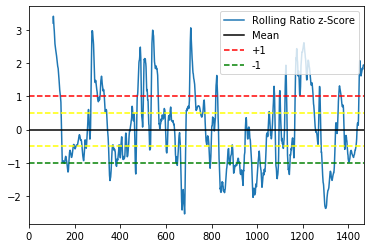

('banks\\CORPBANK.csv', 'banks\\PNB.csv')
3971
(19, 171)
training2718.1244639202214
----
Buying Ratio 3.552713678800501e-15 0.30470739961087534 1 -0.30470739961087534 -1.383065105405535
Buying Ratio 3.552713678800501e-15 0.30429294081917707 2 -0.6090003404300524 -1.376362086570224
Buying Ratio 0.0 0.30950819672131147 3 -0.9185085371513638 -1.3731198666214373
Buying Ratio 0.0 0.30633572934020653 4 -1.2248442664915704 -1.3670202900829898
Buying Ratio 3.552713678800501e-15 0.3099703616330911 5 -1.5348146281246615 -1.3140837127178515
Buying Ratio 3.552713678800501e-15 0.30570289640045367 6 -1.840517524525115 -1.2598663578237472
Buying Ratio 7.105427357601002e-15 0.29993365096041547 7 -2.1404511754855307 -1.221485447889902
Buying Ratio 7.105427357601002e-15 0.29564653524287987 8 -2.4360977107284105 -1.2022657231812273
Buying Ratio 7.105427357601002e-15 0.29675324675324677 9 -2.7328509574816575 -1.1634757676086531
Buying Ratio 7.105427357601002e-15 0.2979830916846608 10 -3.030834049166318 -1

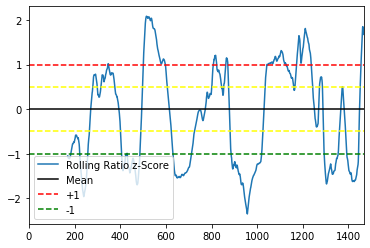

('banks\\HDFCBANK.csv', 'banks\\KOTAKBANK.csv')
1555
(7, 155)
training17286.493810841595
----
Buying Ratio 0.0 0.7952933911671276 1 -0.7952933911671276 -1.336642676095777
Buying Ratio 0.0 0.7967759321336368 2 -1.5920693233007643 -1.41086608415025
Buying Ratio 0.0 0.7950670054507291 3 -2.3871363287514935 -1.4788442000631663
Buying Ratio 0.0 0.7910820145691608 4 -3.1782183433206543 -1.5722285865077104
Buying Ratio 0.0 0.7651537640918135 5 -3.943372107412468 -1.8344920597906864
Buying Ratio 0.0 0.7708352040495974 6 -4.714207311462065 -2.04973544024304
Buying Ratio 0.0 0.7759580510961962 7 -5.490165362558261 -2.2234494372327385
Buying Ratio 0.0 0.7848534297705002 8 -6.275018792328761 -2.338572423566892
Buying Ratio 0.0 0.7841797333777502 9 -7.0591985257065115 -2.3836633930117097
Buying Ratio 0.0 0.7824300028065329 10 -7.841628528513044 -2.4224772694205354
Buying Ratio 0.0 0.784893538636041 11 -8.626522067149086 -2.415990181348444
Buying Ratio 0.0 0.7887071352530253 12 -9.415229202402111 -2

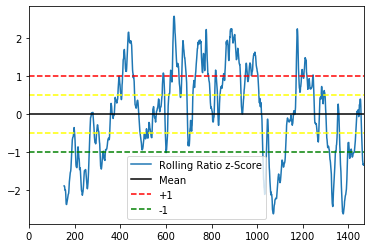

('banks\\J&KBANK.csv', 'banks\\PNB.csv')
723
(3, 123)
training4262.231258755436
----
Exit pos 0.0 0.5195500914740244 0 0 -0.25925660708344955
Exit pos 0.0 0.5553225182028845 0 0 -0.14570294910945944
Exit pos 0.0 0.5914915348593069 0 0 0.2384932703342358
Selling Ratio 0.0 0.6103759008060107 -1 0.6103759008060107 1.0784567074871003
Selling Ratio 0.0 0.6079060172629491 -2 1.2182819180689597 1.2084426592560835
Selling Ratio 0.0 0.6301663954875707 -3 1.8484483135565304 1.5215385482389134
Selling Ratio -7.105427357601002e-15 0.6358754271938868 -4 2.4843237407504173 1.6914619302042957
Selling Ratio 0.0 0.6341463106846348 -5 3.118470051435052 1.8681990195795215
Selling Ratio 0.0 0.6952330304281313 -6 3.813703081863183 2.231152252987759
Selling Ratio 0.0 0.6787062102425876 -7 4.492409292105771 2.443592571634049
Selling Ratio 0.0 0.6638069919571046 -8 5.156216284062875 2.594837792480331
Selling Ratio 7.105427357601002e-15 0.6545842221348329 -9 5.810800506197708 2.304051213338597
Selling Ratio 7.

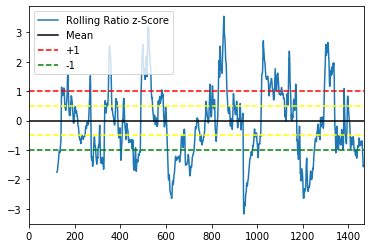

('fmcg\\COLPAL.csv', 'fmcg\\DABUR.csv')
3199
(15, 199)
training24566.34085620303
----
Buying Ratio 0.0 2.7382464505375674 1 -2.7382464505375674 -1.0900697437918048
Buying Ratio 0.0 2.7423913918923324 2 -5.4806378424299 -1.2313951085500763
Buying Ratio 0.0 2.79017953450306 3 -8.27081737693296 -1.3296641016183044
Buying Ratio 0.0 2.817433399394751 4 -11.088250776327712 -1.3897689416076178
Buying Ratio 0.0 2.8085688404961004 5 -13.896819616823812 -1.4125313394340535
Buying Ratio 0.0 2.7950942272245145 6 -16.691913844048326 -1.4667912928204898
Buying Ratio 0.0 2.808079931471709 7 -19.499993775520036 -1.4496085753740633
Buying Ratio 0.0 2.8129525918966642 8 -22.3129463674167 -1.4016149320961007
Buying Ratio 0.0 2.806576799889466 9 -25.119523167306166 -1.3689142765839735
Buying Ratio 0.0 2.784900950258347 10 -27.904424117564513 -1.4129145839679704
Buying Ratio 0.0 2.8076200541190945 11 -30.71204417168361 -1.437952278111469
Buying Ratio 0.0 2.8333338330126883 12 -33.545378004696296 -1.4353570

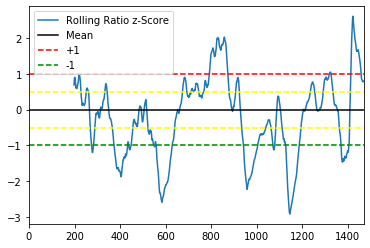

('fmcg\\COLPAL.csv', 'fmcg\\GSKCONS.csv')
3991
(19, 191)
training39539.520253828945
----
Buying Ratio 0.0 0.15550749577906786 1 -0.15550749577906786 -1.4237505957576209
Buying Ratio 0.0 0.1544003850980864 2 -0.30990788087715426 -1.4066717162097633
Buying Ratio 0.0 0.1542311642413047 3 -0.46413904511845894 -1.3857731226906922
Buying Ratio 0.0 0.157225569827596 4 -0.621364614946055 -1.3420633926732974
Buying Ratio 0.0 0.163290922078617 5 -0.784655537024672 -1.277351567348424
Buying Ratio 0.0 0.16133831803485507 6 -0.945993855059527 -1.2315904057799774
Buying Ratio 0.0 0.1626987440488325 7 -1.1086925991083596 -1.1923626694876146
Buying Ratio 0.0 0.16150270384282028 8 -1.2701953029511799 -1.1571842116618705
Buying Ratio 0.0 0.15651844222746122 9 -1.4267137451786411 -1.1271742010838968
Buying Ratio 0.0 0.1536675783490573 10 -1.5803813235276984 -1.0968602295468264
Buying Ratio 0.0 0.1574300105385813 11 -1.7378113340662797 -1.0536412312363008
Buying Ratio 0.0 0.15868467730931915 12 -1.8964960

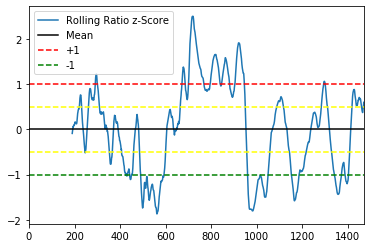

('fmcg\\COLPAL.csv', 'fmcg\\PGHH.csv')
1582
(7, 182)
training32144.859790643088
----
Buying Ratio 0.0 0.1060227455429001 1 -0.1060227455429001 -1.5192894044494882
Buying Ratio 0.0 0.10454297086529382 2 -0.21056571640819394 -1.5454636177093832
Buying Ratio 0.0 0.10601360434758379 3 -0.3165793207557777 -1.5450572514079075
Buying Ratio 0.0 0.10558947143122747 4 -0.4221687921870052 -1.5500441872780253
Buying Ratio 0.0 0.10949966570469673 5 -0.5316684578917019 -1.47800292356907
Buying Ratio 0.0 0.10855318291078332 6 -0.6402216408024852 -1.4146800852340575
Buying Ratio 0.0 0.10723368375405301 7 -0.7474553245565383 -1.387663954524628
Buying Ratio 0.0 0.10644204371867529 8 -0.8538973682752136 -1.3675439661418591
Buying Ratio 0.0 0.1052714152408883 9 -0.9591687835161019 -1.3385267109598424
Buying Ratio 0.0 0.10557710173156917 10 -1.064745885247671 -1.3277056512789307
Buying Ratio 0.0 0.10369265851373871 11 -1.1684385437614098 -1.3365483901370059
Buying Ratio 0.0 0.10404938737143488 12 -1.272487

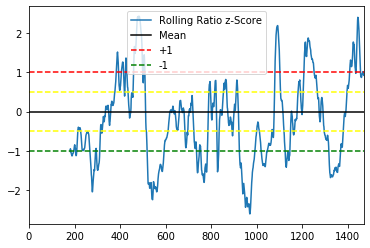

('fmcg\\DABUR.csv', 'fmcg\\GILLETTE.csv')
384
(1, 184)
training8716.083240710159
----
Buying Ratio 0.0 0.054323782046254654 1 -0.054323782046254654 -1.137452384831697
Buying Ratio 0.0 0.05374093410297638 2 -0.10806471614923104 -1.2256199922077708
Buying Ratio 0.0 0.054801676675215044 3 -0.1628663928244461 -1.029713328313186
Exit pos 84.42017205944535 0.05833591550626378 0 0 -0.3935524729604708
Exit pos 84.42017205944535 0.059018239277684445 0 0 -0.2570342927187206
Exit pos 84.42017205944535 0.061180950537287476 0 0 0.11683062148277527
Exit pos 84.42017205944535 0.06053877016692789 0 0 0.005569504955725056
Exit pos 84.42017205944535 0.05954938603824093 0 0 -0.16525135797893212
Exit pos 84.42017205944535 0.05978720724172205 0 0 -0.12295176852053867
Exit pos 84.42017205944535 0.06002680527095513 0 0 -0.08023408460165495
Exit pos 84.42017205944535 0.060009298632270815 0 0 -0.0827792758496805
Exit pos 84.42017205944535 0.059579118019179464 0 0 -0.1558886755503508
Exit pos 84.42017205944535 

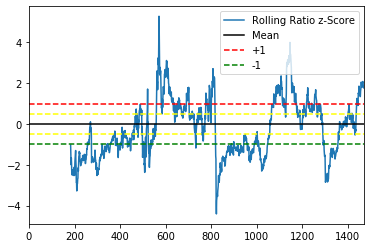

('fmcg\\DABUR.csv', 'fmcg\\PGHH.csv')
2584
(12, 184)
training10742.607506437767
----
Buying Ratio 0.0 0.03727966877233792 1 -0.03727966877233792 -1.2258604983174903
Buying Ratio 0.0 0.036599207557261496 2 -0.07387887632959941 -1.2265672288918181
Buying Ratio 0.0 0.03743584854559038 3 -0.11131472487518979 -1.173761651644114
Buying Ratio 0.0 0.03676091809416738 4 -0.14807564296935716 -1.1417994111636995
Buying Ratio 0.0 0.03702825381318852 5 -0.18510389678254568 -1.1263063379886313
Buying Ratio 0.0 0.03751377294143903 6 -0.22261766972398472 -1.0923148342167843
Buying Ratio 0.0 0.037481279978154564 7 -0.2600989497021393 -1.0619511264523882
Buying Ratio 0.0 0.0374413886693697 8 -0.297540338371509 -1.0256633133915167
Buying Ratio 0.0 0.037410507261527955 9 -0.33495084563303695 -1.003339304008905
Exit pos 244.24882948008053 0.039809754865222056 0 0 -0.49330170981364474
Exit pos 244.24882948008053 0.03956148534039184 0 0 -0.42149258141045226
Exit pos 244.24882948008053 0.03991512858240002 0 0

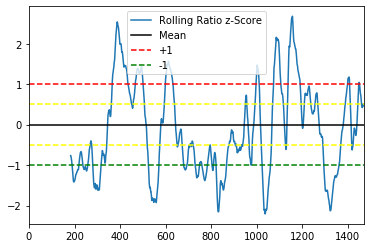

('fmcg\\DABUR.csv', 'fmcg\\UBL.csv')
1559
(7, 159)
training11452.064706479106
----
Buying Ratio 0.0 0.28831648639456936 1 -0.28831648639456936 -1.2600545128259841
Buying Ratio 5.684341886080802e-14 0.29093657358652975 2 -0.5792530599810991 -1.1676101224439532
Buying Ratio 5.684341886080802e-14 0.2897486860319069 3 -0.869001746013006 -1.0075943823715852
Exit pos 57.7084065593661 0.30431369115303153 0 0 -0.4208362665393382
Exit pos 57.7084065593661 0.30665515665400067 0 0 -0.29220393238585574
Exit pos 57.7084065593661 0.30312377664931983 0 0 -0.2041213520430232
Exit pos 57.7084065593661 0.30236803946306084 0 0 -0.10826240700343372
Exit pos 57.7084065593661 0.2993910291115376 0 0 -0.05624925023821125
Exit pos 57.7084065593661 0.30019353863068393 0 0 -0.0682710783322478
Exit pos 57.7084065593661 0.2960456006003385 0 0 -0.08659915719179634
Exit pos 57.7084065593661 0.2960780614547903 0 0 -0.13255956560469692
Exit pos 57.7084065593661 0.2891034252822124 0 0 -0.24306002321708256
Exit pos 57.7

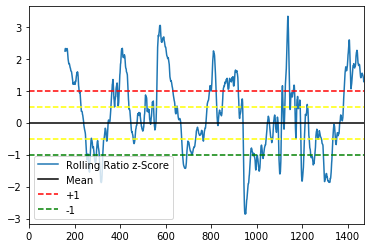

('fmcg\\GILLETTE.csv', 'fmcg\\PGHH.csv')
3999
(19, 199)
training132425.9656002286
----
Exit pos 0.0 0.6633931036116762 0 0 -0.11134460119405414
Exit pos 0.0 0.6640159615598266 0 0 -0.172770317688913
Exit pos 0.0 0.6648041926218582 0 0 -0.22471612133734492
Exit pos 0.0 0.6741989433469195 0 0 -0.23226476273592556
Exit pos 0.0 0.6710255248216581 0 0 -0.2536909265274345
Exit pos 0.0 0.656377695911733 0 0 -0.2875258982103202
Exit pos 0.0 0.6680136925370017 0 0 -0.307169689744443
Exit pos 0.0 0.6708771563549245 0 0 -0.2909479861475965
Exit pos 0.0 0.6812908658336803 0 0 -0.23372684502430047
Exit pos 0.0 0.6837282236105404 0 0 -0.15616806253988672
Exit pos 0.0 0.6937476047074984 0 0 -0.09293339664781816
Exit pos 0.0 0.699526349309256 0 0 -0.030114180243495683
Exit pos 0.0 0.6979130002109818 0 0 0.06195165042384738
Exit pos 0.0 0.6856113385600557 0 0 0.12955246149958502
Exit pos 0.0 0.6986375452906645 0 0 0.23478771537833035
Exit pos 0.0 0.6883444364571636 0 0 0.3075359890622303
Exit pos 0.0 0

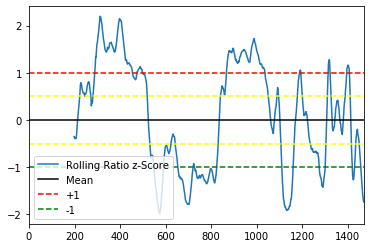

('fmcg\\GSKCONS.csv', 'fmcg\\UBL.csv')
568
(2, 168)
training218774.83628069767
----
Selling Ratio 0.0 5.693815216111213 -1 5.693815216111213 1.0150959737518435
Exit pos 306.72789368737176 5.467878871615691 0 0 0.4038277277392809
Exit pos 306.72789368737176 5.512801358087714 0 0 0.3515121959853566
Exit pos 306.72789368737176 5.5321230416060265 0 0 0.4596272723913005
Exit pos 306.72789368737176 5.474861607178226 0 0 0.3727642587726336
Exit pos 306.72789368737176 5.2849281470302545 0 0 0.08510080684125905
Exit pos 306.72789368737176 5.3636570517673245 0 0 -0.09005700947636225
Exit pos 306.72789368737176 5.382748164431919 0 0 0.07202792245789419
Exit pos 306.72789368737176 5.342997488125067 0 0 0.043875152014126347
Exit pos 306.72789368737176 5.2793637517671534 0 0 -0.11757698312070212
Exit pos 306.72789368737176 5.3076110710773525 0 0 -0.16964044512565107
Exit pos 306.72789368737176 5.203450757141847 0 0 -0.28752409980718546
Exit pos 306.72789368737176 5.2136023189002785 0 0 -0.4352157193

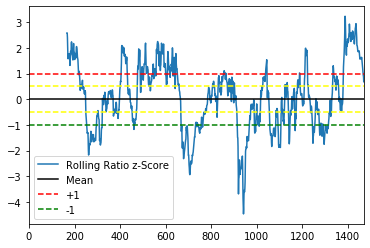

('pharma\\APLLTD.csv', 'pharma\\AUROPHARMA.csv')
3791
(18, 191)
training33116.96528339661
----
Selling Ratio 0.0 0.9047776784203849 -1 0.9047776784203849 1.6416200765660187
Selling Ratio 0.0 0.9225459101254405 -2 1.8273235885458254 1.7662783532382353
Selling Ratio 0.0 0.8923077650411188 -3 2.7196313535869443 1.9008311138621865
Selling Ratio 0.0 0.9132516982685875 -4 3.632883051855532 1.979807214566093
Selling Ratio 0.0 0.922498229917992 -5 4.555381281773524 1.991264147647818
Selling Ratio 0.0 0.9416291865943612 -6 5.497010468367885 2.0270833678407616
Selling Ratio 0.0 0.9004795383467497 -7 6.397490006714635 2.092487576216623
Selling Ratio 0.0 0.9458719119353703 -8 7.343361918650006 2.158087565591945
Selling Ratio 0.0 0.9603187429940919 -9 8.303680661644098 2.2059276350191386
Selling Ratio 0.0 0.9722986141393558 -10 9.275979275783454 2.2688887246520855
Selling Ratio 0.0 0.9523394596020939 -11 10.228318735385548 2.284008368051633
Selling Ratio 0.0 0.9648683236712806 -12 11.19318705905682

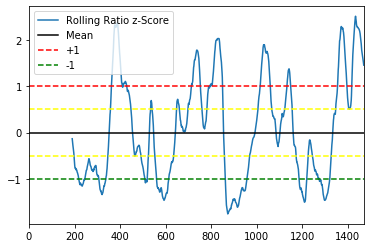

('pharma\\APLLTD.csv', 'pharma\\GLAXO.csv')
2996
(14, 196)
training33552.38664047765
----
Selling Ratio 0.0 0.44194469100114175 -1 0.44194469100114175 1.6591153827547358
Selling Ratio 0.0 0.43301058268105186 -2 0.8749552736821936 1.5729673182215498
Selling Ratio 0.0 0.4395453959415358 -3 1.3145006696237294 1.4904560211456532
Selling Ratio 0.0 0.43762755420363203 -4 1.7521282238273614 1.3687811902149358
Selling Ratio 0.0 0.44800534965136213 -5 2.2001335734787237 1.3136619414725712
Selling Ratio 0.0 0.44207958557665 -6 2.6422131590553737 1.207623089720082
Selling Ratio 0.0 0.44344986226970323 -7 3.085663021325077 1.113201556717512
Exit pos 110.49648935820733 0.4277940275112806 0 0 0.44262554685221334
Exit pos 110.49648935820733 0.4385006747867006 0 0 0.42489757150069907
Exit pos 110.49648935820733 0.4517665287309806 0 0 0.4962475270708469
Exit pos 110.49648935820733 0.4401097225189052 0 0 0.497633957604391
Exit pos 110.49648935820733 0.43340510126989984 0 0 0.4834990301047578
Exit pos 11

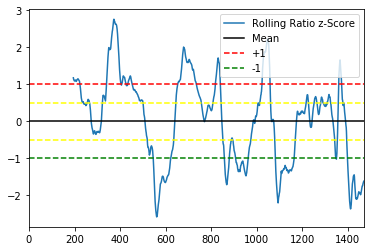

In [83]:
for pairs in all_pairs:
    for i in pairs:
        print(i)
        window_1 = optimal_window(i[0],i[1])
        print('----')
        trade1(i[0],i[1],window_1)
        plotter(i[0],i[1],window_1)

('banks\\CORPBANK.csv', 'banks\\J&KBANK.csv')
1307
(6, 107)
training1833.1639298116113
----
Selling Ratio 0.0 0.7807692564102564 -1 0.7807692564102564 1.3008107419469046
Selling Ratio -3.552713678800501e-15 0.7320574337812784 -2 1.5128266901915348 1.2016347930879483
Exit pos 9.5874608979456 0.6517467391211079 0 0 0.2023099867462852
Exit pos 9.5874608979456 0.6428571505875076 0 0 -0.12464017118404164
Exit pos 9.5874608979456 0.6440129727729439 0 0 -0.4348856771141059
Buying Ratio 9.587460897945597 0.5717092113277323 1 -0.5717092113277323 -1.094870764344225
Buying Ratio 9.587460897945597 0.5755755640525413 2 -1.1472847753802737 -1.2496583910309993
Buying Ratio 9.587460897945597 0.5653040651922606 3 -1.7125888405725345 -1.3830173497884046
Buying Ratio 9.5874608979456 0.5790554501220647 4 -2.2916442906945993 -1.486666005586975
Buying Ratio 9.587460897945604 0.5644669847715736 5 -2.856111275466173 -1.5935928184525812
Buying Ratio 9.587460897945604 0.5814433195876288 6 -3.437554595053802 -1.

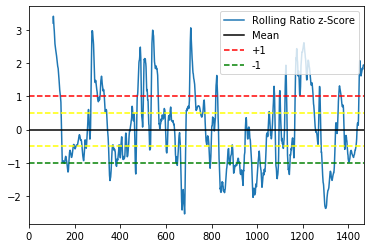

('banks\\CORPBANK.csv', 'banks\\SBIN.csv')
2399
(11, 199)
training753.1007430078824
----
Buying Ratio 3.552713678800501e-15 0.07092696629213484 1 -0.07092696629213484 -1.2153242597275866
Buying Ratio 3.552713678800501e-15 0.07197833769595226 2 -0.1429053039880871 -1.2351613520686415
Buying Ratio 3.552713678800501e-15 0.07206549003007127 3 -0.21497079401815838 -1.277350549162263
Buying Ratio 0.0 0.07036655504843023 4 -0.2853373490665886 -1.319891401469925
Buying Ratio 0.0 0.07059168255287082 5 -0.35592903161945944 -1.3619844264512089
Buying Ratio 0.0 0.07021897518248175 6 -0.4261480068019412 -1.382095914387684
Buying Ratio 0.0 0.06911101531984895 7 -0.4952590221217902 -1.414935044262005
Buying Ratio 0.0 0.07038167633587786 8 -0.5656406984576681 -1.4350903487437823
Buying Ratio 0.0 0.06821262104668409 9 -0.6338533195043522 -1.4606421960247207
Buying Ratio 0.0 0.06982975776179982 10 -0.703683077266152 -1.4593505139768919
Buying Ratio 0.0 0.07067595445579039 11 -0.7743590317219424 -1.45582

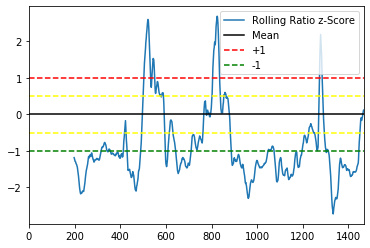

('banks\\HDFCBANK.csv', 'banks\\SBIN.csv')
516
(2, 116)
training27726.738566834243
----
Selling Ratio 0.0 3.8186038387448806 -1 3.8186038387448806 1.0849863498263312
Selling Ratio 0.0 3.744708018254192 -2 7.563311856999073 1.0498557825195887
Exit pos 146.09716988863374 3.5522319764867833 0 0 -0.030603891089577007
Exit pos 146.09716988863374 3.5975000548913068 0 0 -0.17161162119265916
Exit pos 146.09716988863374 3.5723905709482575 0 0 -0.1555681394482988
Exit pos 146.09716988863374 3.5430094874160867 0 0 -0.32100108650959586
Exit pos 146.09716988863374 3.5256329256193357 0 0 -0.45868680366089504
Exit pos 146.09716988863374 3.531927888941119 0 0 -0.4818387268119431
Exit pos 146.09716988863374 3.5603457670270067 0 0 -0.35783183651256995
Exit pos 146.09716988863374 3.5880157696522774 0 0 -0.16078466587632864
Exit pos 146.09716988863374 3.6214465639391427 0 0 0.05770259847746171
Exit pos 146.09716988863374 3.5972286096774186 0 0 0.08481648444531276
Exit pos 146.09716988863374 3.612072398731

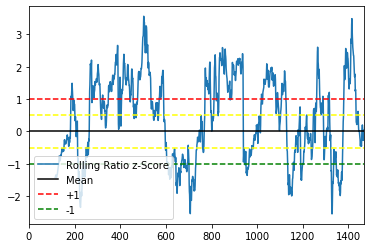

('banks\\KOTAKBANK.csv', 'banks\\SBIN.csv')
3953
(19, 153)
training40849.246743346244
----
Exit pos 0.0 4.333872404929265 0 0 0.4464510233641861
Exit pos 0.0 4.3082723009481425 0 0 0.38687360962331485
Exit pos 0.0 4.311145158824658 0 0 0.32231688061693
Exit pos 0.0 4.343621949590658 0 0 0.23486028792607502
Exit pos 0.0 4.493053976907426 0 0 0.1998102721112906
Exit pos 0.0 4.424221942178638 0 0 0.1809946683494838
Exit pos 0.0 4.373589194063876 0 0 0.14681374387100793
Exit pos 0.0 4.337665069739484 0 0 0.1383202301470636
Exit pos 0.0 4.305349196210952 0 0 0.10517116048749595
Exit pos 0.0 4.344900635688154 0 0 0.08487113489562356
Exit pos 0.0 4.283862731705172 0 0 0.02384276768830981
Exit pos 0.0 4.290116040431667 0 0 0.005683088861508831
Exit pos 0.0 4.2964355121234385 0 0 -0.026988832360264284
Exit pos 0.0 4.419633671188426 0 0 -0.03225076082465927
Exit pos 0.0 4.395979054489925 0 0 -0.04573273133827877
Exit pos 0.0 4.260974410840769 0 0 -0.0572844391593986
Exit pos 0.0 4.16237096673743

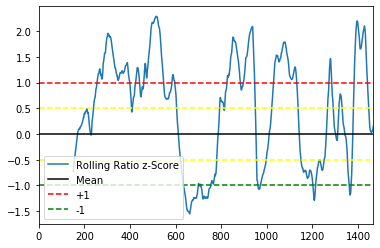

('fmcg\\COLPAL.csv', 'fmcg\\DABUR.csv')
3199
(15, 199)
training24566.34085620303
----
Buying Ratio 0.0 2.7382464505375674 1 -2.7382464505375674 -1.0900697437918048
Buying Ratio 0.0 2.7423913918923324 2 -5.4806378424299 -1.2313951085500763
Buying Ratio 0.0 2.79017953450306 3 -8.27081737693296 -1.3296641016183044
Buying Ratio 0.0 2.817433399394751 4 -11.088250776327712 -1.3897689416076178
Buying Ratio 0.0 2.8085688404961004 5 -13.896819616823812 -1.4125313394340535
Buying Ratio 0.0 2.7950942272245145 6 -16.691913844048326 -1.4667912928204898
Buying Ratio 0.0 2.808079931471709 7 -19.499993775520036 -1.4496085753740633
Buying Ratio 0.0 2.8129525918966642 8 -22.3129463674167 -1.4016149320961007
Buying Ratio 0.0 2.806576799889466 9 -25.119523167306166 -1.3689142765839735
Buying Ratio 0.0 2.784900950258347 10 -27.904424117564513 -1.4129145839679704
Buying Ratio 0.0 2.8076200541190945 11 -30.71204417168361 -1.437952278111469
Buying Ratio 0.0 2.8333338330126883 12 -33.545378004696296 -1.4353570

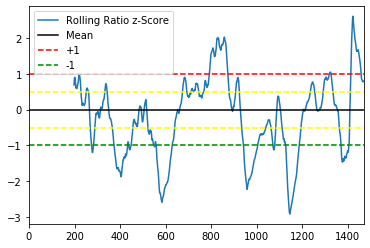

('fmcg\\COLPAL.csv', 'fmcg\\GSKCONS.csv')
3991
(19, 191)
training39539.520253828945
----
Buying Ratio 0.0 0.15550749577906786 1 -0.15550749577906786 -1.4237505957576209
Buying Ratio 0.0 0.1544003850980864 2 -0.30990788087715426 -1.4066717162097633
Buying Ratio 0.0 0.1542311642413047 3 -0.46413904511845894 -1.3857731226906922
Buying Ratio 0.0 0.157225569827596 4 -0.621364614946055 -1.3420633926732974
Buying Ratio 0.0 0.163290922078617 5 -0.784655537024672 -1.277351567348424
Buying Ratio 0.0 0.16133831803485507 6 -0.945993855059527 -1.2315904057799774
Buying Ratio 0.0 0.1626987440488325 7 -1.1086925991083596 -1.1923626694876146
Buying Ratio 0.0 0.16150270384282028 8 -1.2701953029511799 -1.1571842116618705
Buying Ratio 0.0 0.15651844222746122 9 -1.4267137451786411 -1.1271742010838968
Buying Ratio 0.0 0.1536675783490573 10 -1.5803813235276984 -1.0968602295468264
Buying Ratio 0.0 0.1574300105385813 11 -1.7378113340662797 -1.0536412312363008
Buying Ratio 0.0 0.15868467730931915 12 -1.8964960

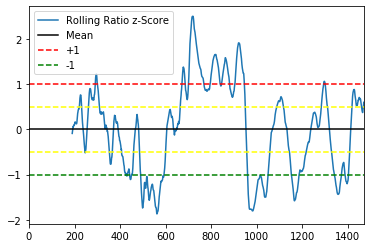

('fmcg\\COLPAL.csv', 'fmcg\\PGHH.csv')
1582
(7, 182)
training32144.859790643088
----
Buying Ratio 0.0 0.1060227455429001 1 -0.1060227455429001 -1.5192894044494882
Buying Ratio 0.0 0.10454297086529382 2 -0.21056571640819394 -1.5454636177093832
Buying Ratio 0.0 0.10601360434758379 3 -0.3165793207557777 -1.5450572514079075
Buying Ratio 0.0 0.10558947143122747 4 -0.4221687921870052 -1.5500441872780253
Buying Ratio 0.0 0.10949966570469673 5 -0.5316684578917019 -1.47800292356907
Buying Ratio 0.0 0.10855318291078332 6 -0.6402216408024852 -1.4146800852340575
Buying Ratio 0.0 0.10723368375405301 7 -0.7474553245565383 -1.387663954524628
Buying Ratio 0.0 0.10644204371867529 8 -0.8538973682752136 -1.3675439661418591
Buying Ratio 0.0 0.1052714152408883 9 -0.9591687835161019 -1.3385267109598424
Buying Ratio 0.0 0.10557710173156917 10 -1.064745885247671 -1.3277056512789307
Buying Ratio 0.0 0.10369265851373871 11 -1.1684385437614098 -1.3365483901370059
Buying Ratio 0.0 0.10404938737143488 12 -1.272487

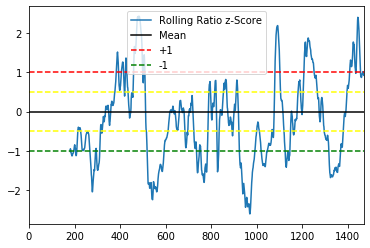

('fmcg\\COLPAL.csv', 'fmcg\\UNITDSPR.csv')
3804
(19, 4)
training146461.06652999285
----
Selling Ratio 0.0 2.0202422183261706 -1 2.0202422183261706 1.1778566117302516
Selling Ratio 0.0 1.928433656936975 -2 3.9486758752631457 1.1986842788577896
Selling Ratio 0.0 1.9059947017177554 -3 5.854670576980901 1.2043066126446393
Selling Ratio 0.0 1.7603681380210556 -4 7.6150387150019565 1.5480542835831028
Selling Ratio 0.0 1.7680564693136078 -5 9.383095184315565 2.314223116328783
Selling Ratio 0.0 1.7236493123744097 -6 11.106744496689974 2.8972832321620636
Selling Ratio 0.0 1.737654574313801 -7 12.844399071003775 12.14684392140332
Selling Ratio 0.0 1.7433504642220532 -8 14.587749535225829 12.361807016496853
Selling Ratio 0.0 1.7453336710798562 -9 16.333083206305684 21.685067910065605
Selling Ratio 0.0 1.7062547940360435 -10 18.03933800034173 10.849007121970619
Selling Ratio 0.0 1.7107027236854653 -11 19.750040724027194 9.052568581553246
Selling Ratio 0.0 1.7000821045827321 -12 21.450122828609928 

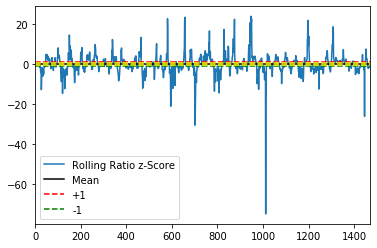

('fmcg\\DABUR.csv', 'fmcg\\GSKCONS.csv')
1734
(8, 134)
training10909.323672574372
----
Exit pos 0.0 0.05632465941261127 0 0 -0.4072026310029836
Exit pos 0.0 0.05642993916790836 0 0 -0.44717662352490134
Exit pos 0.0 0.05614075652799935 0 0 -0.4891034090441866
Buying Ratio 0.0 0.05366178465668531 1 -0.05366178465668531 -1.0975563097337793
Buying Ratio 0.0 0.05261285237005823 2 -0.10627463702674353 -1.1897843887218513
Buying Ratio 0.0 0.05205821386803486 3 -0.1583328508947784 -1.2981338723955063
Buying Ratio 0.0 0.05279705206678152 4 -0.21112990296155992 -1.4074163013577194
Buying Ratio 0.0 0.05103462577084626 5 -0.2621645287324062 -1.5467633183663243
Buying Ratio 0.0 0.05165131668300552 6 -0.31381584541541174 -1.5989508822680054
Buying Ratio 0.0 0.05145637741064279 7 -0.36527222282605454 -1.698726645302101
Buying Ratio 0.0 0.0513522890513041 8 -0.41662451187735866 -1.8063267583075968
Buying Ratio 0.0 0.05084697941071931 9 -0.46747149128807797 -1.8779207817331836
Buying Ratio 0.0 0.051418

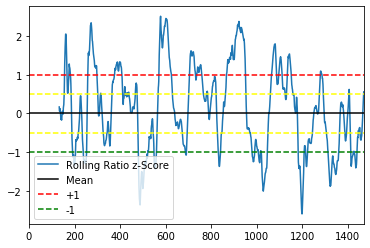

('fmcg\\DABUR.csv', 'fmcg\\PGHH.csv')
2584
(12, 184)
training10742.607506437767
----
Buying Ratio 0.0 0.03727966877233792 1 -0.03727966877233792 -1.2258604983174903
Buying Ratio 0.0 0.036599207557261496 2 -0.07387887632959941 -1.2265672288918181
Buying Ratio 0.0 0.03743584854559038 3 -0.11131472487518979 -1.173761651644114
Buying Ratio 0.0 0.03676091809416738 4 -0.14807564296935716 -1.1417994111636995
Buying Ratio 0.0 0.03702825381318852 5 -0.18510389678254568 -1.1263063379886313
Buying Ratio 0.0 0.03751377294143903 6 -0.22261766972398472 -1.0923148342167843
Buying Ratio 0.0 0.037481279978154564 7 -0.2600989497021393 -1.0619511264523882
Buying Ratio 0.0 0.0374413886693697 8 -0.297540338371509 -1.0256633133915167
Buying Ratio 0.0 0.037410507261527955 9 -0.33495084563303695 -1.003339304008905
Exit pos 244.24882948008053 0.039809754865222056 0 0 -0.49330170981364474
Exit pos 244.24882948008053 0.03956148534039184 0 0 -0.42149258141045226
Exit pos 244.24882948008053 0.03991512858240002 0 0

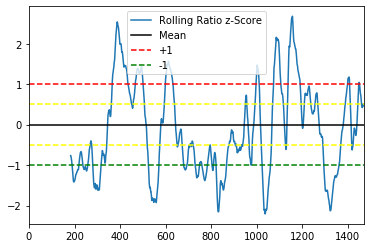

('fmcg\\DABUR.csv', 'fmcg\\UBL.csv')
1559
(7, 159)
training11452.064706479106
----
Buying Ratio 0.0 0.28831648639456936 1 -0.28831648639456936 -1.2600545128259841
Buying Ratio 5.684341886080802e-14 0.29093657358652975 2 -0.5792530599810991 -1.1676101224439532
Buying Ratio 5.684341886080802e-14 0.2897486860319069 3 -0.869001746013006 -1.0075943823715852
Exit pos 57.7084065593661 0.30431369115303153 0 0 -0.4208362665393382
Exit pos 57.7084065593661 0.30665515665400067 0 0 -0.29220393238585574
Exit pos 57.7084065593661 0.30312377664931983 0 0 -0.2041213520430232
Exit pos 57.7084065593661 0.30236803946306084 0 0 -0.10826240700343372
Exit pos 57.7084065593661 0.2993910291115376 0 0 -0.05624925023821125
Exit pos 57.7084065593661 0.30019353863068393 0 0 -0.0682710783322478
Exit pos 57.7084065593661 0.2960456006003385 0 0 -0.08659915719179634
Exit pos 57.7084065593661 0.2960780614547903 0 0 -0.13255956560469692
Exit pos 57.7084065593661 0.2891034252822124 0 0 -0.24306002321708256
Exit pos 57.7

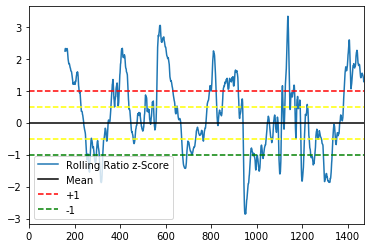

('fmcg\\DABUR.csv', 'fmcg\\UNITDSPR.csv')
3604
(18, 4)
training37822.74403992942
----
Selling Ratio 0.0 0.756596684997588 -1 0.756596684997588 2.363711340339718
Selling Ratio 0.0 0.7522178492714829 -2 1.5088145342690709 3.0411243461149633
Selling Ratio 0.0 0.6946939293407128 -3 2.2035084636097837 1.6748116113519926
Selling Ratio 0.0 0.6619335861860639 -4 2.8654420497958477 1.2188923148142299
Selling Ratio 0.0 0.5908705656289672 -5 3.4563126154248147 1.2116344474384395
Selling Ratio 0.0 0.5940409212081865 -6 4.0503535366330015 2.061174744725364
Selling Ratio 5.684341886080802e-14 0.5727631214798684 -7 4.6231166581128695 3.1066154420539482
Selling Ratio 5.684341886080802e-14 0.5764368996048541 -8 5.199553557717723 12.181680826944902
Selling Ratio 1.1368683772161603e-13 0.5825126160393779 -9 5.7820661737571015 12.757296589929153
Selling Ratio 1.1368683772161603e-13 0.5953104646210944 -10 6.377376638378196 10.997699283151922
Selling Ratio 1.7053025658242404e-13 0.5879986156577287 -11 6.965

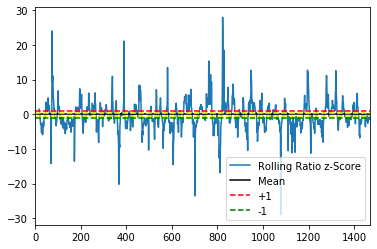

('fmcg\\GILLETTE.csv', 'fmcg\\UNITDSPR.csv')
2989
(14, 189)
training256773.2190204419
----
Exit pos 0.0 11.689050922791187 0 0 0.4480358716019878
Exit pos 0.0 11.664178482204543 0 0 0.39710821219016007
Exit pos 0.0 12.032908519123335 0 0 0.36645895513096977
Exit pos 0.0 11.644046228714524 0 0 0.32093851249066
Exit pos 0.0 11.871825772100749 0 0 0.265929830466704
Exit pos 0.0 11.968963282632508 0 0 0.21258356680487298
Exit pos 0.0 12.058129756432248 0 0 0.17870013142269875
Exit pos 0.0 11.908548867007124 0 0 0.1517043151698111
Exit pos 0.0 12.176520577911125 0 0 0.13651439425611084
Exit pos 0.0 12.516212567413264 0 0 0.14461821074630019
Exit pos 0.0 11.974151741086757 0 0 0.110648545340423
Exit pos 0.0 12.362344293066512 0 0 0.11814170097959459
Exit pos 0.0 12.177756968294773 0 0 0.1264635329640865
Exit pos 0.0 12.082091117612588 0 0 0.13629772861639194
Exit pos 0.0 12.023069189758859 0 0 0.15591244990038874
Exit pos 0.0 11.966849139515952 0 0 0.1714986241938562
Exit pos 0.0 11.94729014

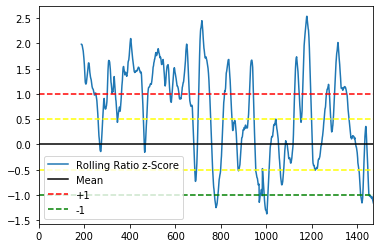

('fmcg\\GODREJCP.csv', 'fmcg\\ITC.csv')
497
(2, 97)
training14836.337647957718
----
Buying Ratio 0.0 2.4726258715889924 1 -2.4726258715889924 -1.3113587192511376
Buying Ratio 0.0 2.4453478922157834 2 -4.917973763804776 -1.3196753212887027
Buying Ratio 0.0 2.4580610131352856 3 -7.376034776940061 -1.3447413124343244
Buying Ratio 0.0 2.4147676425949216 4 -9.790802419534984 -1.4218018466516478
Buying Ratio 0.0 2.4072496087672026 5 -12.198052028302186 -1.5549150309503579
Buying Ratio 0.0 2.4175743577308335 6 -14.61562638603302 -1.5230811288264605
Buying Ratio 0.0 2.4596985731687773 7 -17.075324959201797 -1.3581625790781988
Buying Ratio 0.0 2.470539909294979 8 -19.545864868496775 -1.177669191210895
Buying Ratio 0.0 2.4808561490550876 9 -22.026721017551864 -1.092842044104995
Buying Ratio 0.0 2.4917282085593335 10 -24.518449226111198 -1.017556776439858
Buying Ratio 0.0 2.458827193500914 11 -26.97727641961211 -1.0676436430209624
Buying Ratio 0.0 2.4473495559388985 12 -29.42462597555101 -1.17652

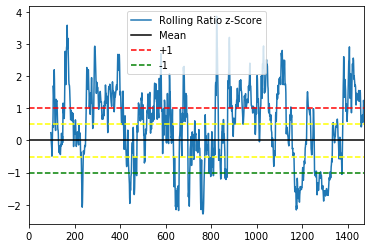

('fmcg\\GSKCONS.csv', 'fmcg\\UBL.csv')
568
(2, 168)
training218774.83628069767
----
Selling Ratio 0.0 5.693815216111213 -1 5.693815216111213 1.0150959737518435
Exit pos 306.72789368737176 5.467878871615691 0 0 0.4038277277392809
Exit pos 306.72789368737176 5.512801358087714 0 0 0.3515121959853566
Exit pos 306.72789368737176 5.5321230416060265 0 0 0.4596272723913005
Exit pos 306.72789368737176 5.474861607178226 0 0 0.3727642587726336
Exit pos 306.72789368737176 5.2849281470302545 0 0 0.08510080684125905
Exit pos 306.72789368737176 5.3636570517673245 0 0 -0.09005700947636225
Exit pos 306.72789368737176 5.382748164431919 0 0 0.07202792245789419
Exit pos 306.72789368737176 5.342997488125067 0 0 0.043875152014126347
Exit pos 306.72789368737176 5.2793637517671534 0 0 -0.11757698312070212
Exit pos 306.72789368737176 5.3076110710773525 0 0 -0.16964044512565107
Exit pos 306.72789368737176 5.203450757141847 0 0 -0.28752409980718546
Exit pos 306.72789368737176 5.2136023189002785 0 0 -0.4352157193

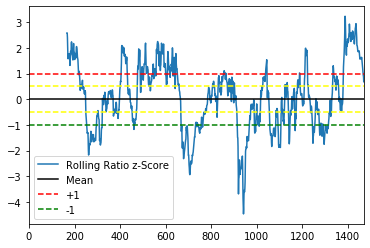

('fmcg\\GSKCONS.csv', 'fmcg\\UNITDSPR.csv')
1152
(5, 152)
training226058.20472347134
----
Selling Ratio 0.0 13.583516207243719 -1 13.583516207243719 1.056677276691747
Selling Ratio 0.0 13.549851460726936 -2 27.133367667970653 1.0363858875524843
Selling Ratio 0.0 13.455810587586836 -3 40.589178255557485 1.0966792255377587
Selling Ratio 0.0 13.63670495055743 -4 54.225883206114915 1.131695310577468
Selling Ratio 0.0 13.576854133399056 -5 67.80273733951397 1.1244612195754309
Selling Ratio 0.0 13.223115110187708 -6 81.02585244970167 1.1308084684173365
Selling Ratio 0.0 13.313273507018044 -7 94.33912595671971 1.071016260092984
Selling Ratio 0.0 13.778537965346104 -8 108.11766392206582 1.0281301469663309
Selling Ratio 0.0 13.569131384972776 -9 121.6867953070386 1.1057657296073886
Selling Ratio 0.0 13.584797236104935 -10 135.27159254314353 1.1616254936845507
Selling Ratio 0.0 13.315354520966542 -11 148.58694706411006 1.1926728736724177
Selling Ratio 0.0 13.509860521201412 -12 162.0968075853114

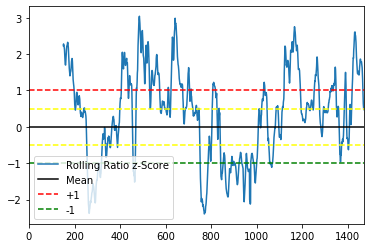

('fmcg\\HINDUNILVR.csv', 'fmcg\\UBL.csv')
3795
(18, 195)
training73022.52621845712
----
Exit pos 0.0 1.2403142297672922 0 0 0.07080611347930083
Exit pos 0.0 1.252639684807745 0 0 0.023586377893876135
Exit pos 0.0 1.2130523457694347 0 0 -0.05840464435673831
Exit pos 0.0 1.2180185805996142 0 0 -0.1550490166457294
Exit pos 0.0 1.2542782128576477 0 0 -0.21032660855080346
Exit pos 0.0 1.2342414377850013 0 0 -0.261978035325563
Exit pos 0.0 1.228159934158331 0 0 -0.3313825907307574
Exit pos 0.0 1.2002861097053605 0 0 -0.3936742546666283
Exit pos 0.0 1.2238719569714063 0 0 -0.4568848445419435
Exit pos 0.0 1.3291247388708112 0 0 -0.4796143465383863
Exit pos 0.0 1.3342754615776944 0 0 -0.4192824870138614
Exit pos 0.0 1.3295754479566506 0 0 -0.34435821819803075
Exit pos 0.0 1.357004864435884 0 0 -0.2607303745782015
Exit pos 0.0 1.3655144844586753 0 0 -0.1381615266145463
Exit pos 0.0 1.3887863405743626 0 0 -0.005238593763840292
Exit pos 0.0 1.431666547241558 0 0 0.1258053437978403
Exit pos 0.0 1.4

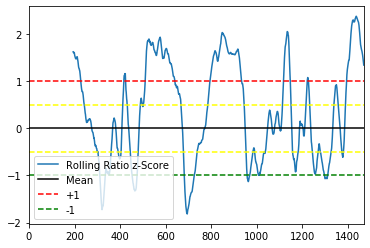

('fmcg\\HINDUNILVR.csv', 'fmcg\\UNITDSPR.csv')
3804
(19, 4)
training119069.68566081679
----
Selling Ratio 0.0 2.8603539918446517 -1 2.8603539918446517 1.6692623795792074
Selling Ratio 2.2737367544323206e-13 2.8035479728272112 -2 5.663901964671863 1.7308758087101512
Selling Ratio 2.2737367544323206e-13 2.7811943510126746 -3 8.445096315684538 1.631005937652863
Selling Ratio 2.2737367544323206e-13 2.5706119878770597 -4 11.015708303561597 1.6623749847211344
Selling Ratio 2.2737367544323206e-13 2.625484280377205 -5 13.641192583938803 2.0647459197582054
Selling Ratio 2.2737367544323206e-13 2.5628956482291847 -6 16.204088232167987 2.5599854452292745
Selling Ratio 2.2737367544323206e-13 2.570252712413245 -7 18.774340944581233 9.592918431652764
Selling Ratio 2.2737367544323206e-13 2.587845331010234 -8 21.36218627559147 8.68529557101486
Selling Ratio 2.2737367544323206e-13 2.6408151957314083 -9 24.00300147132288 6.212258552828545
Selling Ratio 2.2737367544323206e-13 2.5840257549369325 -10 26.587

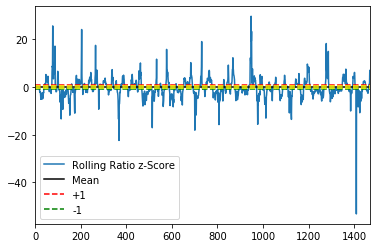

('fmcg\\PGHH.csv', 'fmcg\\UNITDSPR.csv')
754
(3, 154)
training287814.5514441175
----
Selling Ratio 0.0 19.43607877730323 -1 19.43607877730323 1.1600955711879979
Selling Ratio 0.0 19.70183974157822 -2 39.13791851888145 1.1699026377470647
Selling Ratio 0.0 19.834996370205353 -3 58.9729148890868 1.2503046518813852
Selling Ratio 0.0 19.853496853089244 -4 78.82641174217605 1.3179593612314286
Selling Ratio 0.0 20.224353348788053 -5 99.0507650909641 1.405348909740777
Selling Ratio 1.8189894035458565e-12 19.9776336776285 -6 119.02839876859261 1.4235552972746581
Selling Ratio 1.8189894035458565e-12 20.203655275777955 -7 139.23205404437056 1.4766960722530194
Selling Ratio 1.8189894035458565e-12 20.141389589200497 -8 159.37344363357104 1.4481329958015736
Selling Ratio 1.8189894035458565e-12 19.717576172583318 -9 179.09101980615435 1.3880699115149746
Selling Ratio 1.8189894035458565e-12 19.53365269933895 -10 198.6246725054933 1.2539845700914507
Selling Ratio 1.8189894035458565e-12 18.8607023531640

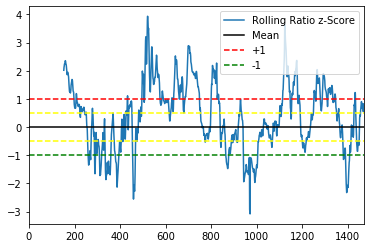

('fmcg\\UBL.csv', 'fmcg\\UNITDSPR.csv')
3698
(18, 98)
training160819.12571704888
----
Selling Ratio 0.0 2.5332522826508828 -1 2.5332522826508828 1.3960748494806277
Selling Ratio 0.0 2.5537021220950122 -2 5.086954404745895 1.3802538876847685
Selling Ratio 0.0 2.5780500991306146 -3 7.66500450387651 1.3720651537091584
Selling Ratio 0.0 2.554815311251324 -4 10.219819815127835 1.3598971117321066
Selling Ratio 0.0 2.463188348508412 -5 12.683008163636247 1.3174392487067887
Selling Ratio 0.0 2.452106048243511 -6 15.135114211879758 1.2662590240410703
Selling Ratio 0.0 2.437380069583478 -7 17.572494281463236 1.237922610466787
Selling Ratio 0.0 2.428143717643183 -8 20.00063799910642 1.213178455674932
Selling Ratio 0.0 2.466575255190563 -9 22.467213254296983 1.1947554735605954
Selling Ratio 0.0 2.4676459220618163 -10 24.9348591763588 1.189655548768359
Selling Ratio 0.0 2.46920632720753 -11 27.40406550356633 1.1686534983921064
Selling Ratio 0.0 2.4015042668904627 -12 29.805569770456792 1.1128361460

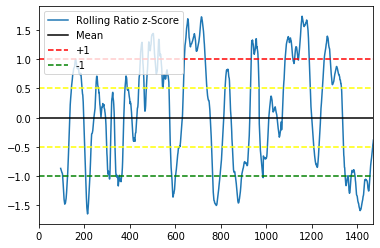

('pharma\\APLLTD.csv', 'pharma\\LUPIN.csv')
2993
(14, 193)
training24252.665461920886
----
Exit pos 0.0 0.667993796225938 0 0 0.35189755416479784
Exit pos 0.0 0.6805659419376426 0 0 0.45640415728983313
Exit pos 0.0 0.6927659922455695 0 0 0.4779540781452861
Exit pos 0.0 0.6953042488361726 0 0 0.45398540280530714
Exit pos 0.0 0.6731357198958244 0 0 0.42313948615551666
Exit pos 0.0 0.6824898859815893 0 0 0.3403128936587716
Exit pos 0.0 0.6836727759594928 0 0 0.2652059360558997
Exit pos 0.0 0.6683207051708651 0 0 0.18858508091459858
Exit pos 0.0 0.6939854593522803 0 0 0.25408283589364783
Exit pos 0.0 0.6903715640312724 0 0 0.27881497102733294
Exit pos 0.0 0.6637031992324912 0 0 0.18341083544886977
Exit pos 0.0 0.6962033679001045 0 0 0.16726591827527956
Exit pos 0.0 0.7184165370069778 0 0 0.2569280954920766
Exit pos 0.0 0.7078516859338457 0 0 0.25441522905045183
Exit pos 0.0 0.7125349180919699 0 0 0.23645149606241764
Exit pos 0.0 0.7042774816250897 0 0 0.24018403158156243
Exit pos 0.0 0.704

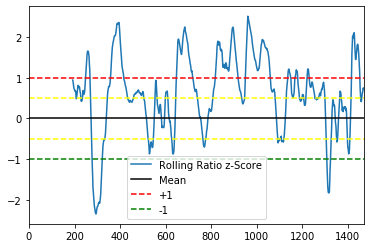

('pharma\\DRREDDY.csv', 'pharma\\GLAXO.csv')
760
(3, 160)
training148937.71372889678
----
Exit pos 0.0 2.092654684348071 0 0 0.45660442806862567
Exit pos 0.0 2.0870082632154947 0 0 0.41474167786751115
Exit pos 0.0 2.1305267987552523 0 0 0.44016503214766123
Exit pos 0.0 2.1079867486051738 0 0 0.4638234692593734
Exit pos 0.0 2.101864844522054 0 0 0.482112171358491
Exit pos 0.0 2.122376186830072 0 0 0.49552798154004585
Selling Ratio 0.0 2.29879738434524 -1 2.29879738434524 1.052674152288102
Selling Ratio 0.0 2.2722962808420277 -2 4.571093665187268 1.2717994412519287
Selling Ratio 0.0 2.2604388293771054 -3 6.831532494564374 1.4157677325815474
Selling Ratio 0.0 2.2560645135569666 -4 9.08759700812134 1.3095029125949003
Selling Ratio 0.0 2.2632581352798753 -5 11.350855143401215 1.275092944354508
Selling Ratio 0.0 2.2563455328047946 -6 13.60720067620601 1.2565919606201805
Selling Ratio 0.0 2.285407245454603 -7 15.892607921660613 1.304745629678717
Selling Ratio 0.0 2.280028055145794 -8 18.17263

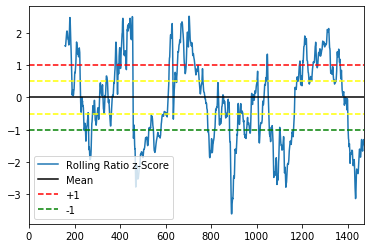

('pharma\\DRREDDY.csv', 'pharma\\TORNTPHARM.csv')
1335
(6, 135)
training135279.65849932542
----
Selling Ratio 0.0 1.683795517478234 -1 1.683795517478234 1.3211228747782122
Selling Ratio 0.0 1.6389506977674404 -2 3.322746215245674 1.5625531129109165
Selling Ratio 0.0 1.6282325272677183 -3 4.950978742513392 1.7932635971696742
Selling Ratio 0.0 1.646040095115442 -4 6.597018837628834 2.0324608417869174
Selling Ratio 0.0 1.645986517314446 -5 8.24300535494328 2.2312124567039726
Selling Ratio 0.0 1.6881525043335808 -6 9.931157859276862 2.3716771535354493
Selling Ratio 0.0 1.7185964719692166 -7 11.64975433124608 2.351250087981044
Selling Ratio 0.0 1.7049980042335173 -8 13.354752335479596 2.4318934584906575
Selling Ratio 0.0 1.7272454193793896 -9 15.081997754858985 2.5645848245720853
Selling Ratio 0.0 1.696910130373509 -10 16.778907885232496 2.6418107363409784
Selling Ratio 0.0 1.6926947269885426 -11 18.471602612221037 2.7038357853058663
Selling Ratio 0.0 1.6928028192655573 -12 20.1644054314865

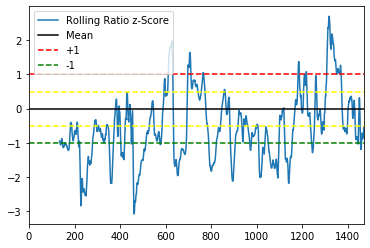

('pharma\\GLAXO.csv', 'pharma\\SUNPHARMA.csv')
1929
(9, 129)
training58946.56800753637
----
Exit pos 0.0 2.6686624080519414 0 0 -0.4099609930642224
Exit pos 0.0 2.709210393394462 0 0 -0.40538342880503264
Exit pos 0.0 2.719701338578968 0 0 -0.39331029904907044
Exit pos 0.0 2.7679730542701866 0 0 -0.3821599401602837
Exit pos 0.0 2.7329391573225013 0 0 -0.3901361088822703
Exit pos 0.0 2.730125743720693 0 0 -0.3954789539566116
Exit pos 0.0 2.762199656334051 0 0 -0.4013233586569729
Exit pos 0.0 2.6786205160658056 0 0 -0.4274240546659904
Exit pos 0.0 2.6771881090558423 0 0 -0.4414691362734372
Exit pos 0.0 2.7134105133671156 0 0 -0.44023085056389655
Exit pos 0.0 2.6969874635795668 0 0 -0.4558051551179583
Exit pos 0.0 2.7256956119094933 0 0 -0.466223210252992
Exit pos 0.0 2.7696666108054693 0 0 -0.47812645474257043
Exit pos 0.0 2.752644933748494 0 0 -0.48806503929010064
Exit pos 0.0 2.7580414240565174 0 0 -0.4979577908519117
Exit pos 0.0 2.8050064393660534 0 0 -0.4883020540418602
Exit pos 0.0 

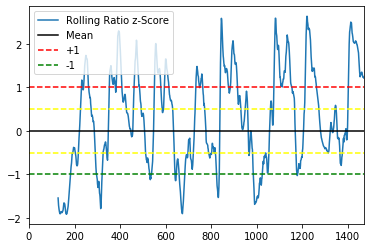

('pharma\\GLAXO.csv', 'pharma\\TORNTPHARM.csv')
2151
(10, 151)
training38568.19082790144
----
Exit pos 0.0 0.7453161066051162 0 0 -0.40281603859917703
Exit pos 0.0 0.7474923036267698 0 0 -0.3226808777964332
Exit pos 0.0 0.7453253018828466 0 0 -0.2733359623498958
Exit pos 0.0 0.7700405238435283 0 0 -0.19089452898411005
Exit pos 0.0 0.793502972472509 0 0 -0.06062459346333718
Exit pos 0.0 0.7912700166120749 0 0 0.06197015902004105
Exit pos 0.0 0.8085812504351315 0 0 0.20913133508532408
Exit pos 0.0 0.8205762359442328 0 0 0.3447199417918455
Exit pos 0.0 0.8081969118549178 0 0 0.45723885503198036
Selling Ratio 0.0 0.8006322834846763 -1 0.8006322834846763 1.0142055169536235
Selling Ratio 0.0 0.8068867707533727 -2 1.607519054238049 1.0567561405491745
Selling Ratio 0.0 0.8064367087168338 -3 2.413955762954883 1.093588298643356
Selling Ratio 0.0 0.8116926951110948 -4 3.2256484580659777 1.0954530928344464
Selling Ratio 0.0 0.79812169773936 -5 4.023770155805337 1.047130586336326
Selling Ratio 0.0 

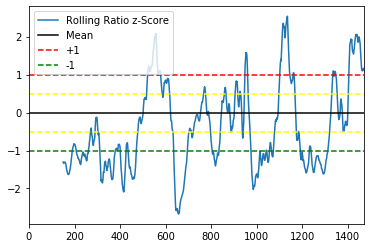

('pharma\\SUNPHARMA.csv', 'pharma\\TORNTPHARM.csv')
1698
(8, 98)
training26920.07370343709
----
Exit pos 0.0 0.25292702458601857 0 0 -0.4634743922225739
Exit pos 0.0 0.25433828883184717 0 0 -0.4142689843388862
Exit pos 0.0 0.25553579699152446 0 0 -0.3580566760230591
Exit pos 0.0 0.2537241109020525 0 0 -0.31234461123478746
Exit pos 0.0 0.2500564811028529 0 0 -0.2803628846576395
Exit pos 0.0 0.2535059718642831 0 0 -0.2507852320100398
Exit pos 0.0 0.2490285228989796 0 0 -0.2503084449180259
Exit pos 0.0 0.25115627425882114 0 0 -0.2407268615999281
Exit pos 0.0 0.24988702993717943 0 0 -0.2302779135690015
Exit pos 0.0 0.2527719929189458 0 0 -0.2170215808124538
Exit pos 0.0 0.2524093518498147 0 0 -0.20790652993115227
Exit pos 0.0 0.2481331724671307 0 0 -0.20627868043623854
Exit pos 0.0 0.2482022298658101 0 0 -0.1909785641246225
Exit pos 0.0 0.24523794965497256 0 0 -0.19861951598324823
Exit pos 0.0 0.2449228694422838 0 0 -0.18952569244936132
Exit pos 0.0 0.25121790381706377 0 0 -0.1655297815480

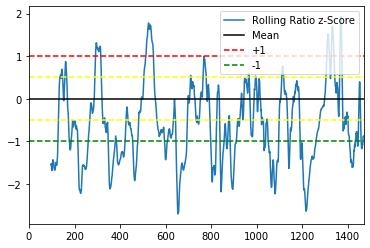

In [84]:
for pairs_ct in all_pairs_ct:
    for i in pairs_ct:
        print(i)
        window_1 = optimal_window(i[0],i[1])
        print('----')
        trade1(i[0],i[1],window_1)
        plotter(i[0],i[1],window_1)